<a href="https://colab.research.google.com/github/AliveBotswana/alivebotswana-eportfolio-msc-ai/blob/main/CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import scipy.stats as st
import missingno as msno
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import KFold, cross_val_score, learning_curve

from google.colab import files
# uploaded = files.upload()

In [ ]:
df = kagglehub.load_dataset(KaggleDatasetAdapter.PANDAS, "dgomonov/new-york-city-airbnb-open-data", 'AB_NYC_2019.csv')

/tmp/ipython-input-2276576450.py:1: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(KaggleDatasetAdapter.PANDAS, "dgomonov/new-york-city-airbnb-open-data", 'AB_NYC_2019.csv')


Using Colab cache for faster access to the 'new-york-city-airbnb-open-data' dataset.


In [ ]:
print("Dataset Shape:", df.shape)

Dataset Shape: (48895, 16)


In [ ]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
print("\nColumns and Data Types:\n", df.dtypes)


Columns and Data Types:
 id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object


In [ ]:
print("\nSummary Statistics:\n", df.describe())


Summary Statistics:
                  id       host_id      latitude     longitude         price  \
count  4.889500e+04  4.889500e+04  48895.000000  48895.000000  48895.000000   
mean   1.901714e+07  6.762001e+07     40.728949    -73.952170    152.720687   
std    1.098311e+07  7.861097e+07      0.054530      0.046157    240.154170   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.471945e+06  7.822033e+06     40.690100    -73.983070     69.000000   
50%    1.967728e+07  3.079382e+07     40.723070    -73.955680    106.000000   
75%    2.915218e+07  1.074344e+08     40.763115    -73.936275    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    48895.000000       48895.000000       38843.000000   
mean         7.029962          23.274466           1.373221   
std         20.510550          44.550582           1.680442   
min          1

In [ ]:
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


In [ ]:
columns_to_drop = ['id', 'host_id', 'name', 'host_name', 'last_review']
df = df.drop(columns=columns_to_drop, axis=1)

In [ ]:
print("\nColumns and Data Types:\n", df.dtypes)


Columns and Data Types:
 neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object


In [ ]:
print("Updated Columns:", df.columns)
print("New Shape:", df.shape)

Updated Columns: Index(['neighbourhood_group', 'neighbourhood', 'latitude', 'longitude',
       'room_type', 'price', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')
New Shape: (48895, 11)


In [ ]:
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

In [ ]:
df = df[df['price'] > 0]

In [ ]:
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64


In [ ]:
df['occupancy_rate'] = (365 - df['availability_365']) / 365 * 100

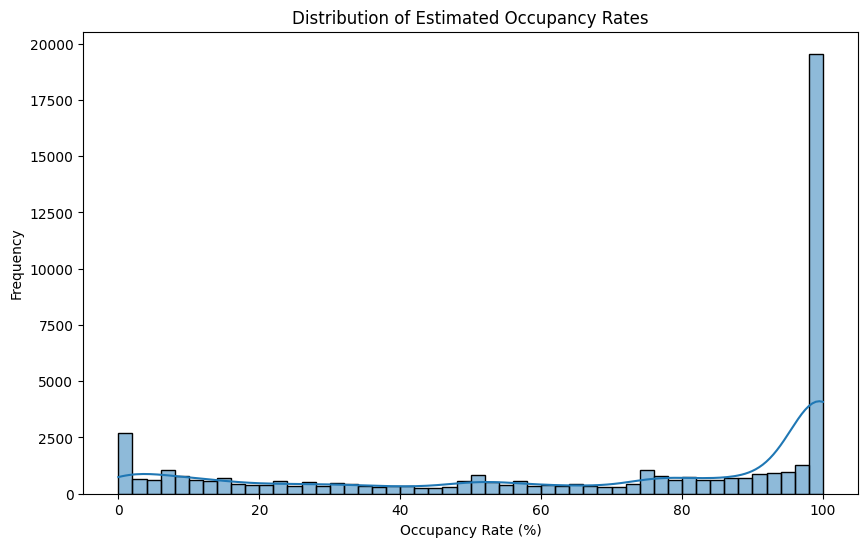

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['occupancy_rate'], bins=50, kde=True)
plt.title('Distribution of Estimated Occupancy Rates')
plt.xlabel('Occupancy Rate (%)')
plt.ylabel('Frequency')
plt.show()

CLUSTERING

In [ ]:
# Feature selection for clustering
cluster_features = ['neighbourhood_group', 'room_type', 'latitude', 'longitude',
                    'occupancy_rate', 'number_of_reviews', 'minimum_nights',
                    'calculated_host_listings_count']

# New dataframe for clustering
df_cluster = df[cluster_features].copy()

# Categorical variables encoding
df_cluster = pd.get_dummies(df_cluster, columns=['neighbourhood_group', 'room_type'], drop_first=True)

# Scale the numerical features (CRITICAL for K-Means)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_cluster_scaled = scaler.fit_transform(df_cluster)

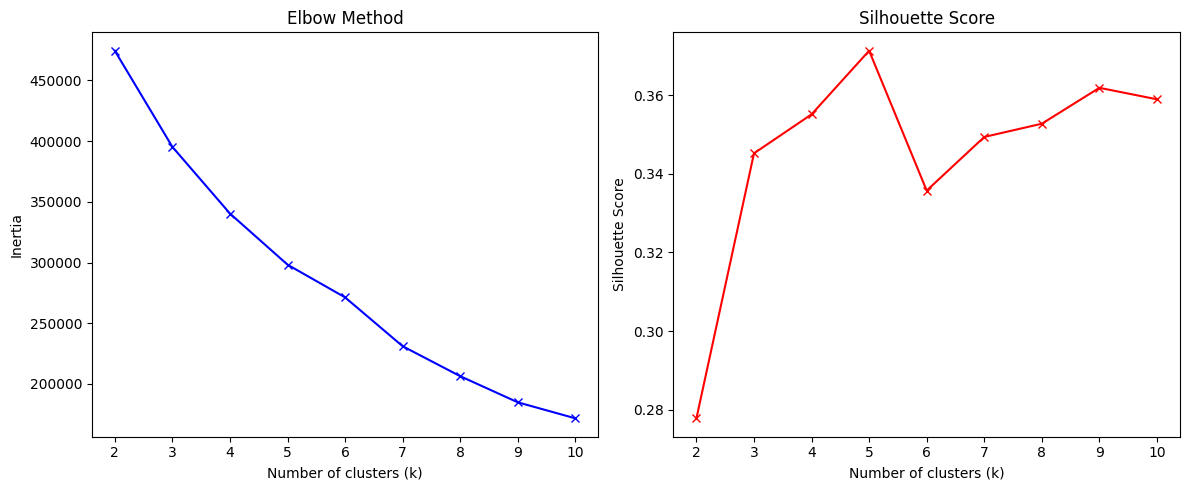

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Define the range of k to test
k_range = range(2, 11)

# Lists to store metrics
inertias = []
silhouette_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_cluster_scaled)
    inertias.append(kmeans.inertia_) # Within-cluster sum-of-squares
    silhouette_scores.append(silhouette_score(df_cluster_scaled, kmeans.labels_))

# Plot the Elbow Method
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(k_range, inertias, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')

# Plot the Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, 'rx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')
plt.tight_layout()
plt.show()

In [ ]:
# Fit K-Means with the chosen k
optimal_k = 5 # Replace with your chosen k
final_kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = final_kmeans.fit_predict(df_cluster_scaled)

# Add the cluster labels back to the ORIGINAL dataframe
df['cluster'] = cluster_labels

# Analyze cluster characteristics
cluster_summary = df.groupby('cluster').agg({
    'price': ['mean', 'count'],
    'occupancy_rate': 'mean',
    'neighbourhood_group': lambda x: x.mode()[0],
    'room_type': lambda x: x.mode()[0],           # Find the most common room type
    'number_of_reviews': 'mean',
    'minimum_nights': 'mean'
}).round(2)

print(cluster_summary)

          price        occupancy_rate neighbourhood_group        room_type  \
           mean  count           mean            <lambda>         <lambda>   
cluster                                                                      
0        273.04    564          22.83           Manhattan  Entire home/apt   
1        124.42  20092          72.55            Brooklyn     Private room   
2        114.81    373          45.29       Staten Island     Private room   
3         99.49   5753          60.10              Queens     Private room   
4        189.94  22102          69.89           Manhattan  Entire home/apt   

        number_of_reviews minimum_nights  
                     mean           mean  
cluster                                   
0                    2.37          30.27  
1                   24.20           6.00  
2                   30.94           4.83  
3                   27.73           5.13  
4                   21.67           7.90  


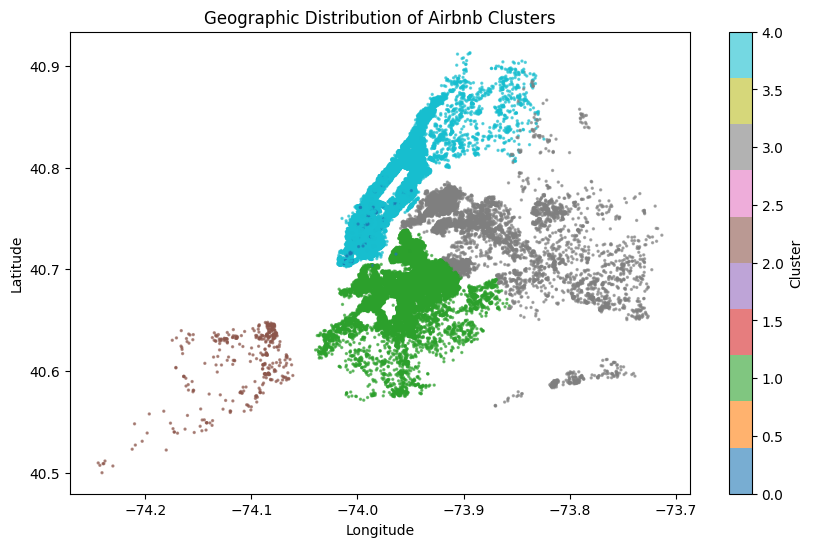

In [ ]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['longitude'], df['latitude'], c=df['cluster'], cmap='tab10', alpha=0.6, s=2)
plt.colorbar(scatter, label='Cluster')
plt.title('Geographic Distribution of Airbnb Clusters')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

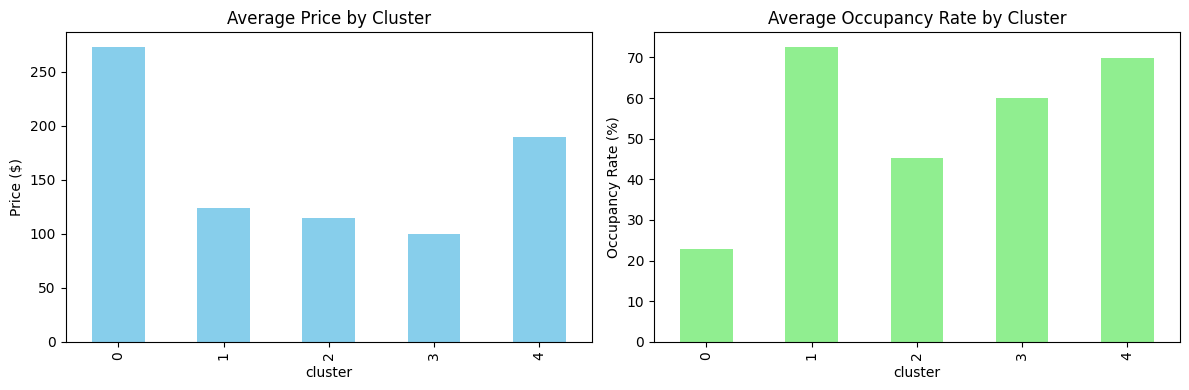

In [ ]:
# Plot average price and occupancy by cluster
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Price
df.groupby('cluster')['price'].mean().plot(kind='bar', ax=ax1, color='skyblue')
ax1.set_title('Average Price by Cluster')
ax1.set_ylabel('Price ($)')

# Occupancy
df.groupby('cluster')['occupancy_rate'].mean().plot(kind='bar', ax=ax2, color='lightgreen')
ax2.set_title('Average Occupancy Rate by Cluster')
ax2.set_ylabel('Occupancy Rate (%)')

plt.tight_layout()
plt.show()